# Feature Importance Analysis

This notebook uses a Random Forest classifier to:
- Train a performance prediction model
- Identify the most influential study-related features

Feature importance helps validate EDA insights and supports decision-making logic.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/processed/processed_student_data.csv")

In [3]:
X = df.drop(["student_id", "predicted_performance"], axis=1)
y = df["predicted_performance"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
importance = model.feature_importances_
features = X.columns

In [7]:
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

In [8]:
feature_importance_df

,Feature,Importance
5,mock_test_score,0.653610
1,hours_studied_per_day,0.135515
6,attendance_percentage,0.075570
2,days_before_exam,0.065550
0,subject,0.025899
3,revision_count,0.023604
4,topic_difficulty,0.020252


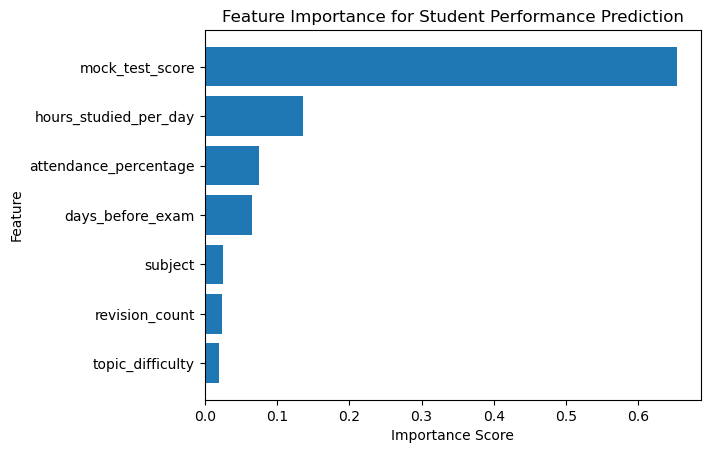

In [9]:
plt.figure()
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Student Performance Prediction")
plt.gca().invert_yaxis()
plt.show()

### Interpretation

- Mock test score and study hours are the strongest predictors
- Revision count plays a significant supporting role
- These insights guide the AI decision engine for personalized recommendations
